In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [49]:
USpolice20 = pd.read_excel("New/USDATA/KnownUSincedents2020/Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2020.xlsx")

## Offenses Known to Law Enforcement
#### by State by City, 2020

In [50]:
USpolice20.drop([0,1,2,3,4,7694,7695,7696,7697,7698,7699,7700,7701,7702],inplace=True)

In [51]:
USpolice20.rename(columns={"Table 8":"State","Unnamed: 1":"City","Unnamed: 2":"Population","Unnamed: 3":"ViolentCrime","Unnamed: 4":"MurderNonnegligentManslaughter",
"Unnamed: 5":"Rape","Unnamed: 6":"Robbery","Unnamed: 7":"AggravatedAssault","Unnamed: 8":"PropertyCrime","Unnamed: 9":"Burglary","Unnamed: 10":"Larcenytheft","Unnamed: 11":"Motor\nvehicle\ntheft","Unnamed: 12":"Arson"},inplace=True)


In [68]:
USpolice20.dropna(inplace=True)

In [69]:
USpolice20

,State,City,Population,ViolentCrime,MurderNonnegligentManslaughter,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larcenytheft,Motor\nvehicle\ntheft,Arson
23,Alaska,Anchorage,286388,3472,18,558,558,2338,9872,1444,7279,1149,73
24,Alaska,Bethel,6642,93,0,43,2,48,71,21,35,15,5
25,Alaska,Bristol Bay Borough,817,4,0,0,0,4,9,5,0,4,0
26,Alaska,Cordova,2161,0,0,0,0,0,6,3,3,0,1
27,Alaska,Craig,1268,3,0,0,0,3,12,2,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,Wyoming,Sheridan4,17991,16,0,2,0,14,264,32,217,15,2
7690,Wyoming,Thermopolis4,2738,3,0,1,0,2,40,5,34,1,0
7691,Wyoming,Torrington,6623,32,0,7,0,25,77,7,69,1,0
7692,Wyoming,Wheatland,3445,6,0,0,0,6,80,22,50,8,0


In [88]:
USpolice=USpolice20.groupby('State')['Population','ViolentCrime','PropertyCrime'].sum()
USpolice

C:\Users\dell\AppData\Local\Temp\ipykernel_12832\1213862490.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  USpolice=USpolice20.groupby('State')['Population','ViolentCrime','PropertyCrime'].sum()


,Population,ViolentCrime,PropertyCrime
State,,,
Alaska,453704,4742,13776
Arizona,5031548,25266,123412
Arkansas,1737760,14823,59458
California,32959442,143513,729147
Colorado,3869491,20290,134136
...,...,...,...
Virginia,3022350,9942,63536
Washington,4857949,17563,169000
West Virginia,387305,2014,10837


In [89]:
USpolice.to_csv('USpolice.csv')

In [71]:
USpolice20.ViolentCrime.describe()

count     7145
unique     603
top          0
freq       772
Name: ViolentCrime, dtype: int64

In [72]:
USpolice20.ViolentCrime.mean()

107.28817354793561

In [73]:
USpolice20.State.describe()

count      7145
unique       65
top       Texas
freq        558
Name: State, dtype: object

In [83]:
USpolice20['Population'].describe()

count     7145
unique    6096
top       1267
freq         5
Name: Population, dtype: int64

In [75]:
USpolice20.PropertyCrime.describe()

count     7145
unique    1455
top          0
freq       160
Name: PropertyCrime, dtype: int64

In [76]:
USpolice20.PropertyCrime.mean()

552.7990202939118

##   Hypothesis:There is no corralation between property crime and bodily crime
## Null: There is higher property damage than there is violent crimes against a person

Analysis:t test

<AxesSubplot: >

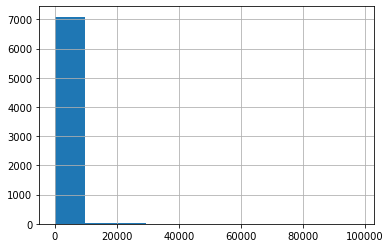

In [77]:
USpolice20['PropertyCrime'].hist()

<AxesSubplot: >

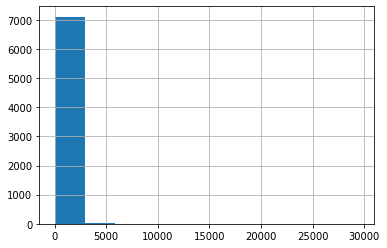

In [78]:
USpolice20['ViolentCrime'].hist()

C:\Users\dell\AppData\Local\Temp\ipykernel_12832\2348802420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USpolice20['ViolentCrime'])


<AxesSubplot: xlabel='ViolentCrime', ylabel='Density'>

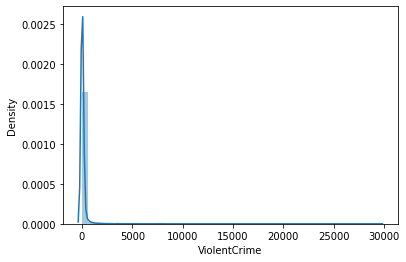

In [79]:
sns.distplot(USpolice20['ViolentCrime'])

<AxesSubplot: >

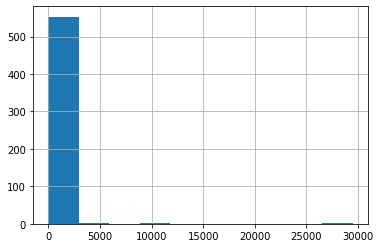

In [80]:
USpolice20.ViolentCrime[USpolice20.State == 'Texas'].hist()

In [81]:
stats.ttest_rel(USpolice20['ViolentCrime'], USpolice20['PropertyCrime'])

Ttest_relResult(statistic=-18.62776249092089, pvalue=1.1610451007500108e-75)

## Hypothesis:There is no corralation between the number of assaults and murder
## Null: As the number of assaults increase there is a increase in murders

Analysis:

## Hypothesis:There is no corralation between the number of crimes and population
## Null: As the population increases there is a increase in crimes

Analysis: